In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Avocado is a fruit consumed by people heavily in the United States.

##### Some relevant columns in the dataset:


Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [2]:
train = pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 1/avocado.csv')
train.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can observe that there are no missing values in dataset

we have 3 categorical columns

In [4]:
from datetime import date

train['Date'] = pd.to_datetime(train.Date)
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day

train

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  month  day  
0      2015            Albany     12   27  
1      2015            Albany     12   20  
2      2015            Albany     12   13  
3      2015            Albany     12    6  
4      2015            Albany     11   29  
...     ...               ...    ...  ...  
18244  2018  WestTexNewMexico      2    4  
18245  2018  WestTexNewMexico      1   28  
18246  2018  WestTexNewMexico      1   21  
18247  2018  WestTexNewMexico      1   14  
18248  2018  WestTexNewMexico      1    7  

[18249 rows x 16 columns]

Seperated day, month and year from date column

In [5]:
print(train['Unnamed: 0'].unique()) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


In [6]:
train.drop('Date', axis=1, inplace=True)
train.drop('Unnamed: 0', axis=1, inplace=True)

Dropped date column as we have seperated them and dropped unnamed:0 column as it has no specific significance

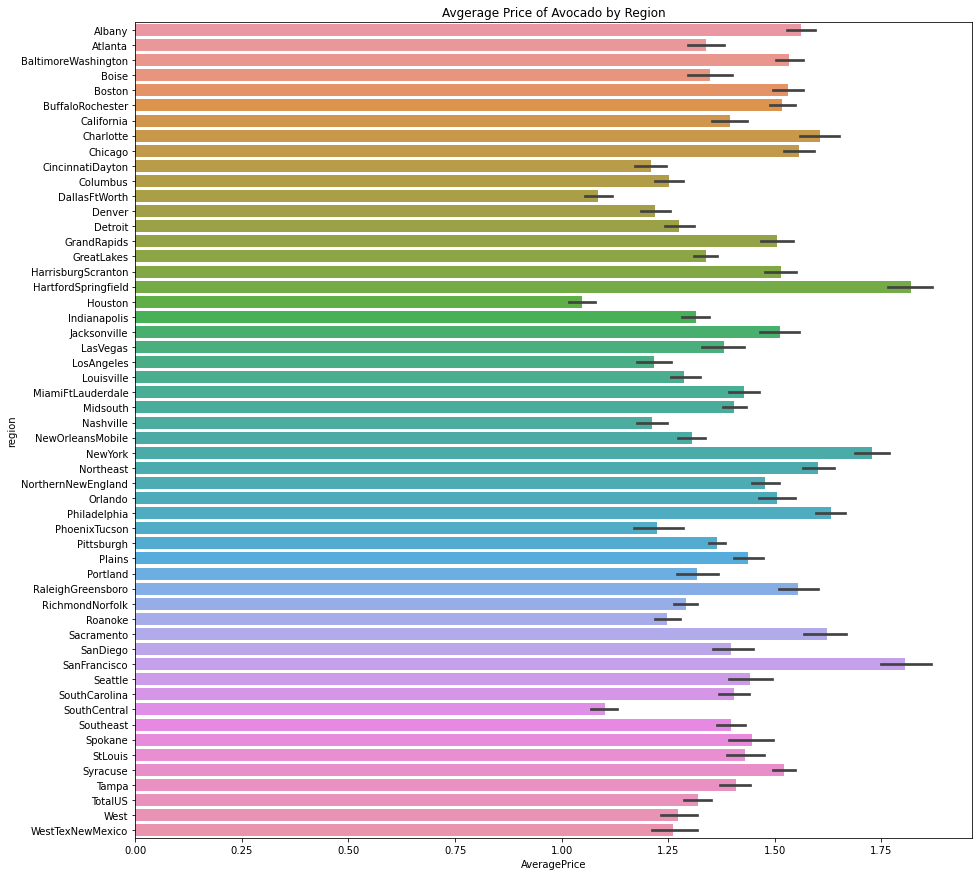

In [7]:
plt.figure(figsize=(15,15))
plt.title("Avgerage Price of Avocado by Region")
sns.barplot(x="AveragePrice",y="region",data=train)
plt.show()

We can observe the average prices in different regions of USA

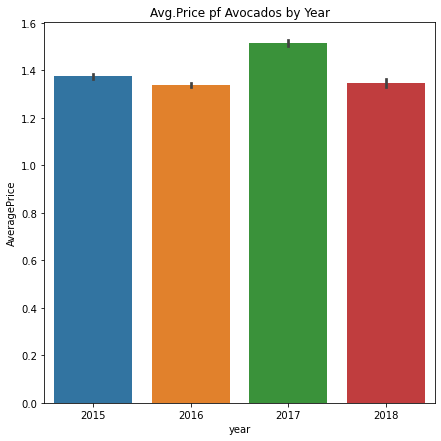

In [8]:
plt.figure(figsize=[7,7])
plt.title("Avg.Price pf Avocados by Year")
sns.barplot(x='year',y='AveragePrice',data=train)
plt.show()

Year 2017 has the maximum average price when compared with other years

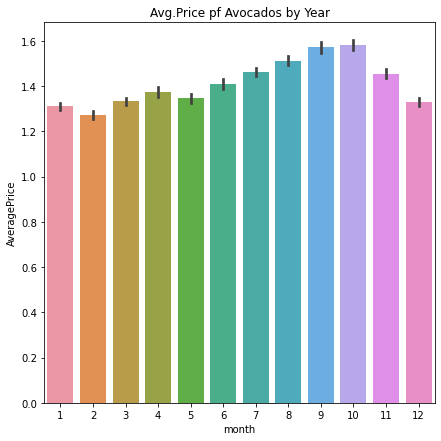

In [9]:
plt.figure(figsize=[7,7])
plt.title("Avg.Price pf Avocados by Year")
sns.barplot(x='month',y='AveragePrice',data=train)
plt.show()

In the month of octomber when can see maximum average price

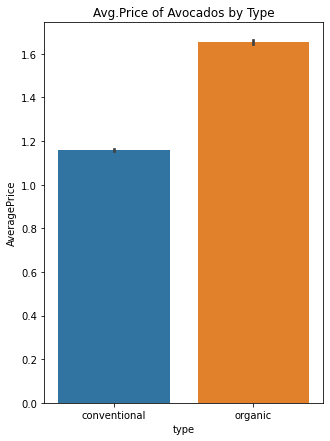

In [96]:
plt.figure(figsize=[5,7])
plt.title("Avg.Price of Avocados by Type")
sns.barplot(x="type",y="AveragePrice",data=train)
plt.show()

We can observe that type conventional has less average price when compared with organic type

In [14]:
train['region'].value_counts()

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['type'] = le.fit_transform(train['type'])
train['region'] = le.fit_transform(train['region'])

converted type and region datatype from object to int using label encoder

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [12]:
train['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

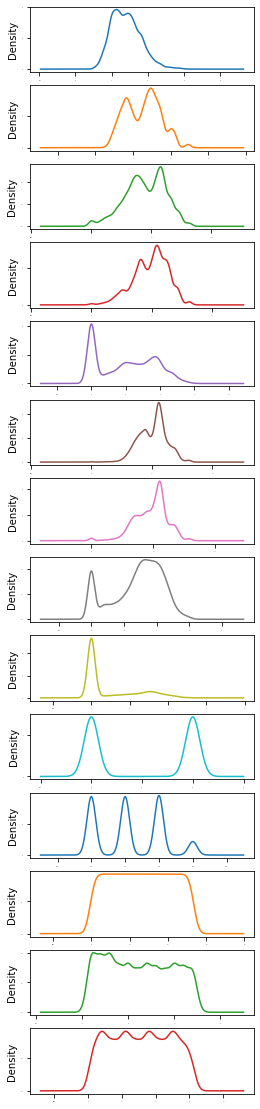

In [18]:
train.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

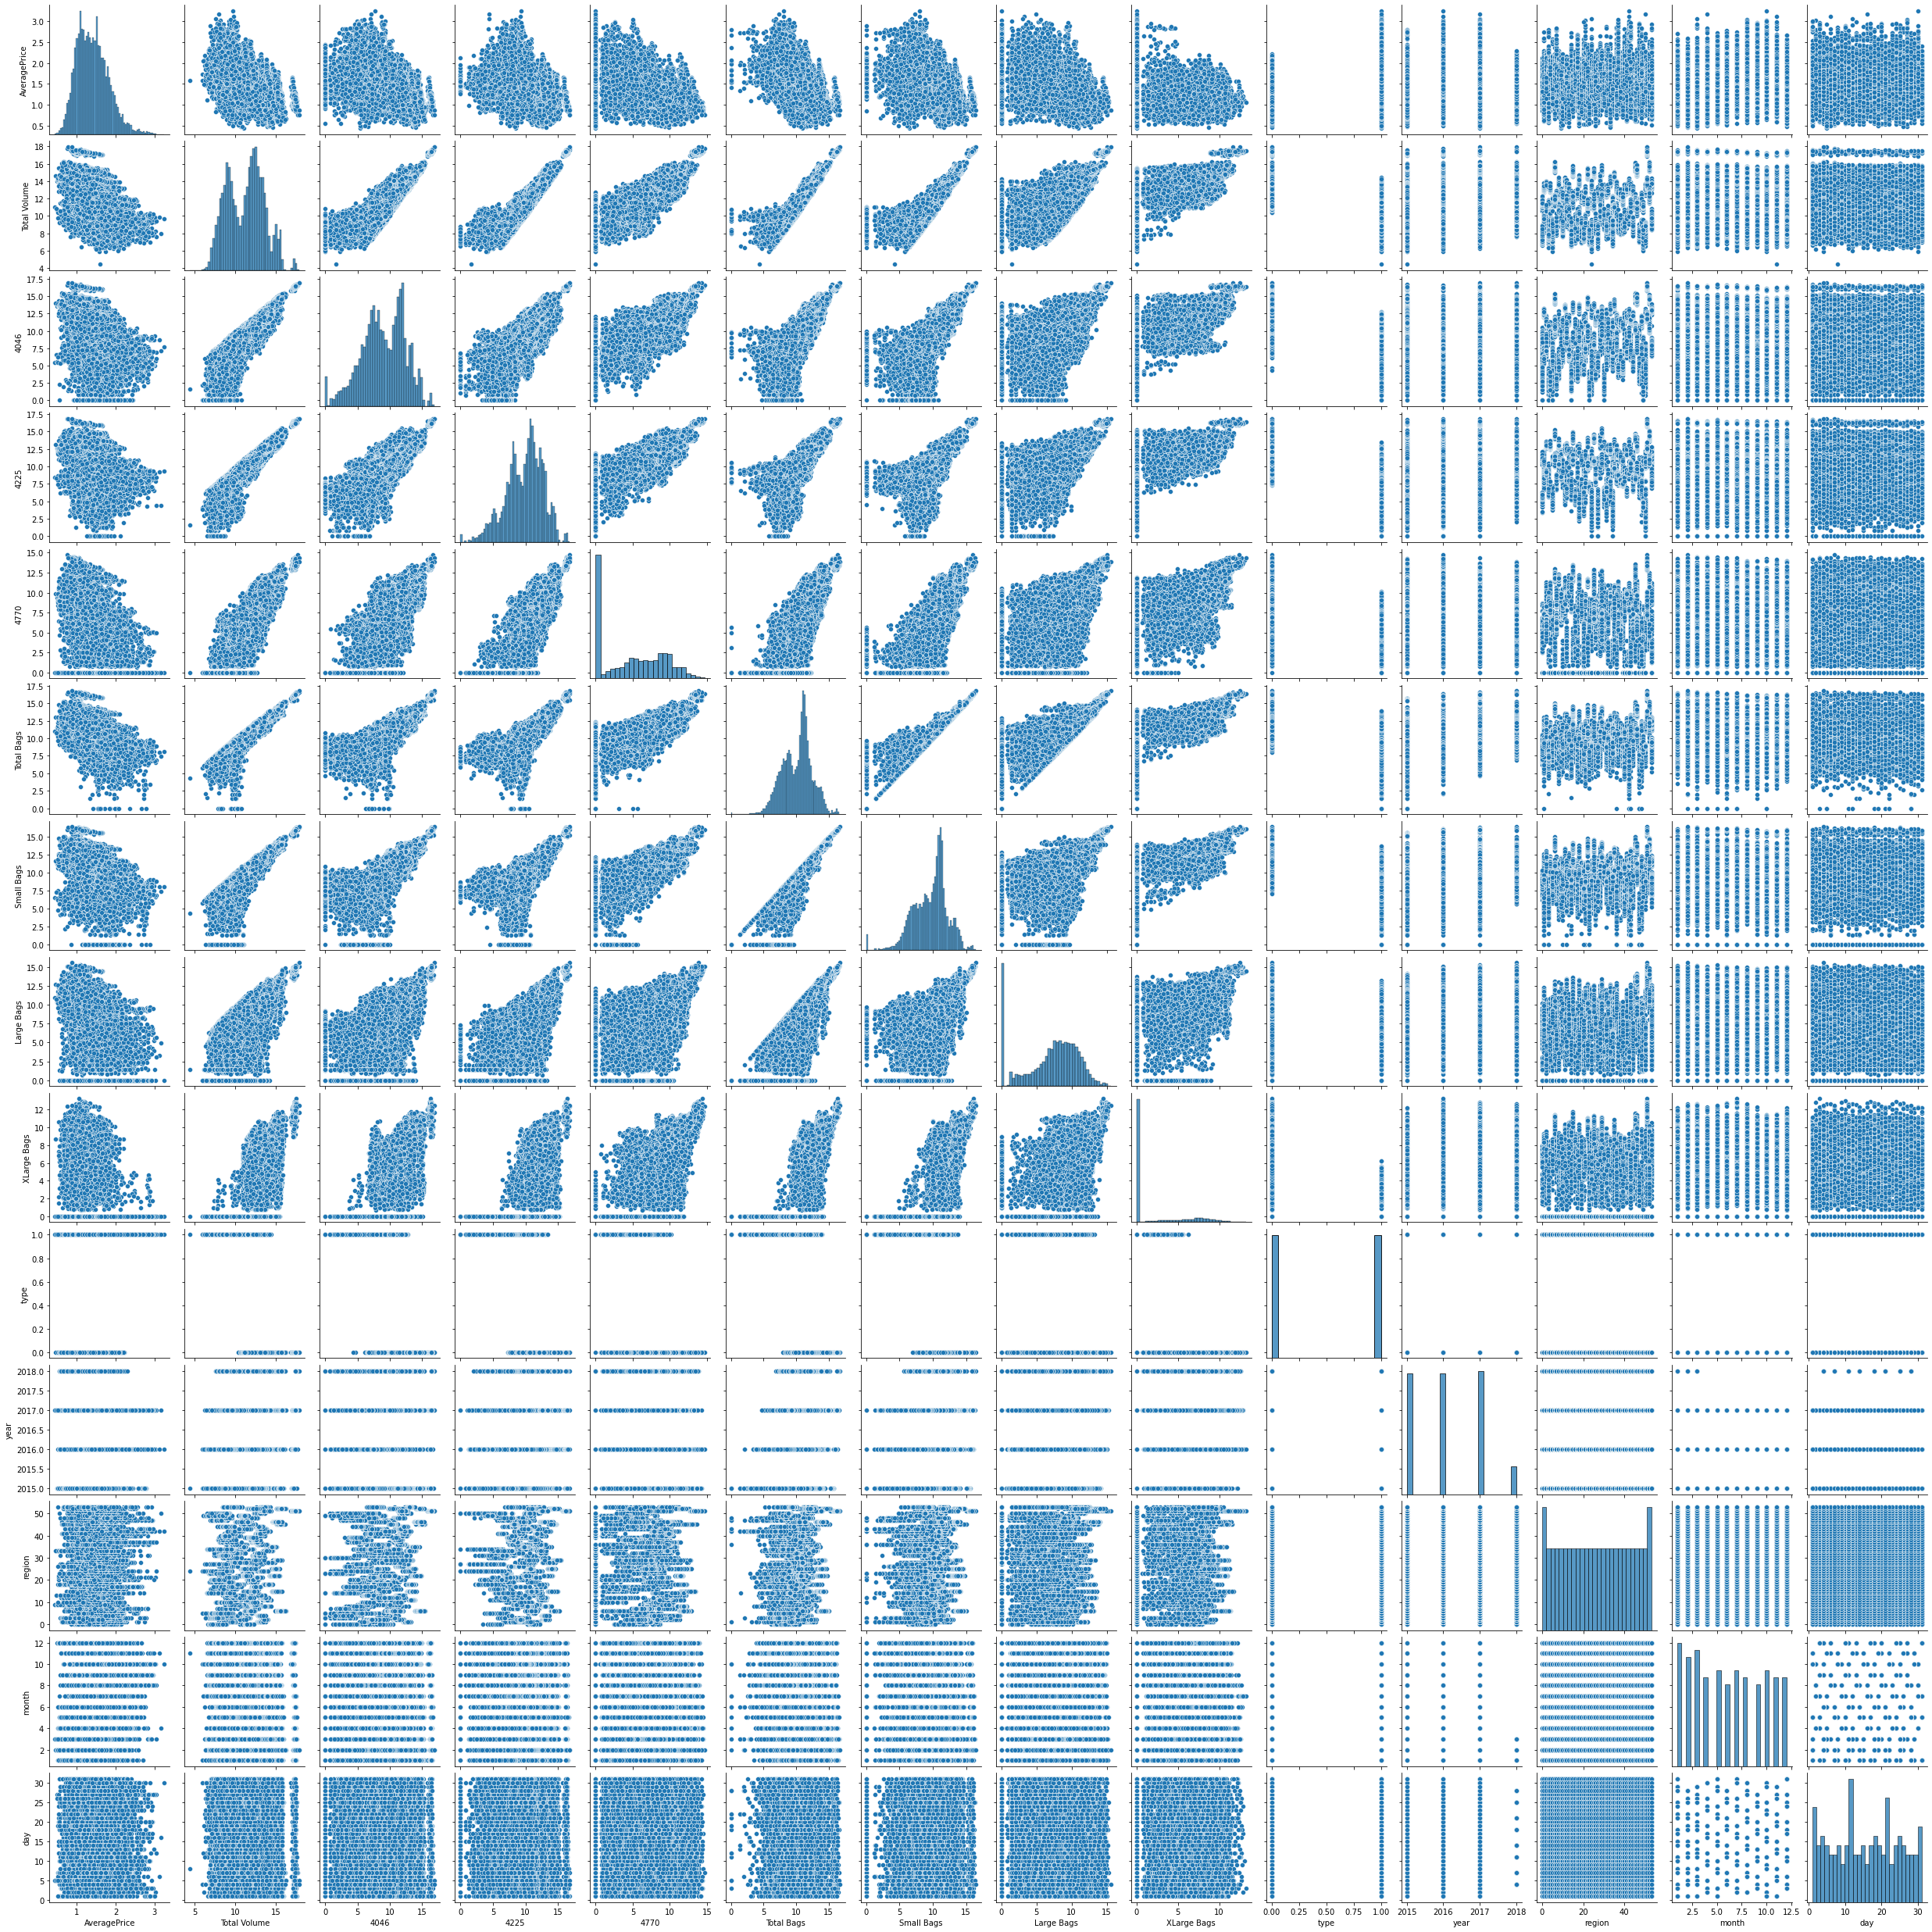

In [19]:
sns.pairplot(train)
plt.show()

From above density and pairplots we can see that the data is skewed at some positions, so we perform log1p transformation technique to remove skewness

In [20]:
train.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
month           0.106617
day             0.014310
dtype: float64

In [21]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags',)
for col in skew:
    if train.skew().loc[col]>0.55:
        train[col]=np.log1p(train[col])

In [22]:
corr_mat = train.corr()
corr_mat

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.583411 -0.543861 -0.446584 -0.507234   
Total Volume     -0.583411      1.000000  0.886538  0.908610  0.834274   
4046             -0.543861      0.886538  1.000000  0.761893  0.747167   
4225             -0.446584      0.908610  0.761893  1.000000  0.794104   
4770             -0.507234      0.834274  0.747167  0.794104  1.000000   
Total Bags       -0.574931      0.934924  0.785653  0.790640  0.773176   
Small Bags       -0.493520      0.876670  0.741634  0.722492  0.747692   
Large Bags       -0.478741      0.671429  0.582992  0.614586  0.558938   
XLarge Bags      -0.403129      0.664903  0.593008  0.594543  0.652076   
type              0.615845     -0.796481 -0.720788 -0.735619 -0.782055   
year              0.093197      0.086274  0.011078  0.014321 -0.040618   
region           -0.011716      0.111673  0.191000  0.072366  0.071842   
month             0.162409     -0.034262 -0.033224 -0.030705 -0.025808   
day               0.027386     -0.010493 -0.007349 -0.008917 -0.002803   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.574931   -0.493520   -0.478741    -0.403129  0.615845   
Total Volume    0.934924    0.876670    0.671429     0.664903 -0.796481   
4046            0.785653    0.741634    0.582992     0.593008 -0.720788   
4225            0.790640    0.722492    0.614586     0.594543 -0.735619   
4770            0.773176    0.747692    0.558938     0.652076 -0.782055   
Total Bags      1.000000    0.929040    0.709648     0.635387 -0.724031   
Small Bags      0.929040    1.000000    0.526174     0.602615 -0.708089   
Large Bags      0.709648    0.526174    1.000000     0.471857 -0.499925   
XLarge Bags     0.635387    0.602615    0.471857     1.000000 -0.669964   
type           -0.724031   -0.708089   -0.499925    -0.669964  1.000000   
year            0.222446    0.202987    0.193857     0.166483 -0.000032   
region          0.105552    0.078192    0.113016     0.015274 -0.000280   
month          -0.022617   -0.017234   -0.020540     0.008066 -0.000085   
day            -0.008874   -0.006399   -0.003034     0.006009 -0.000013   

                  year    region     month       day  
AveragePrice  0.093197 -0.011716  0.162409  0.027386  
Total Volume  0.086274  0.111673 -0.034262 -0.010493  
4046          0.011078  0.191000 -0.033224 -0.007349  
4225          0.014321  0.072366 -0.030705 -0.008917  
4770         -0.040618  0.071842 -0.025808 -0.002803  
Total Bags    0.222446  0.105552 -0.022617 -0.008874  
Small Bags    0.202987  0.078192 -0.017234 -0.006399  
Large Bags    0.193857  0.113016 -0.020540 -0.003034  
XLarge Bags   0.166483  0.015274  0.008066  0.006009  
type         -0.000032 -0.000280 -0.000085 -0.000013  
year          1.000000 -0.000055 -0.177050  0.004475  
region       -0.000055  1.000000 -0.000144 -0.000021  
month        -0.177050 -0.000144  1.000000  0.010621  
day           0.004475 -0.000021  0.010621  1.000000

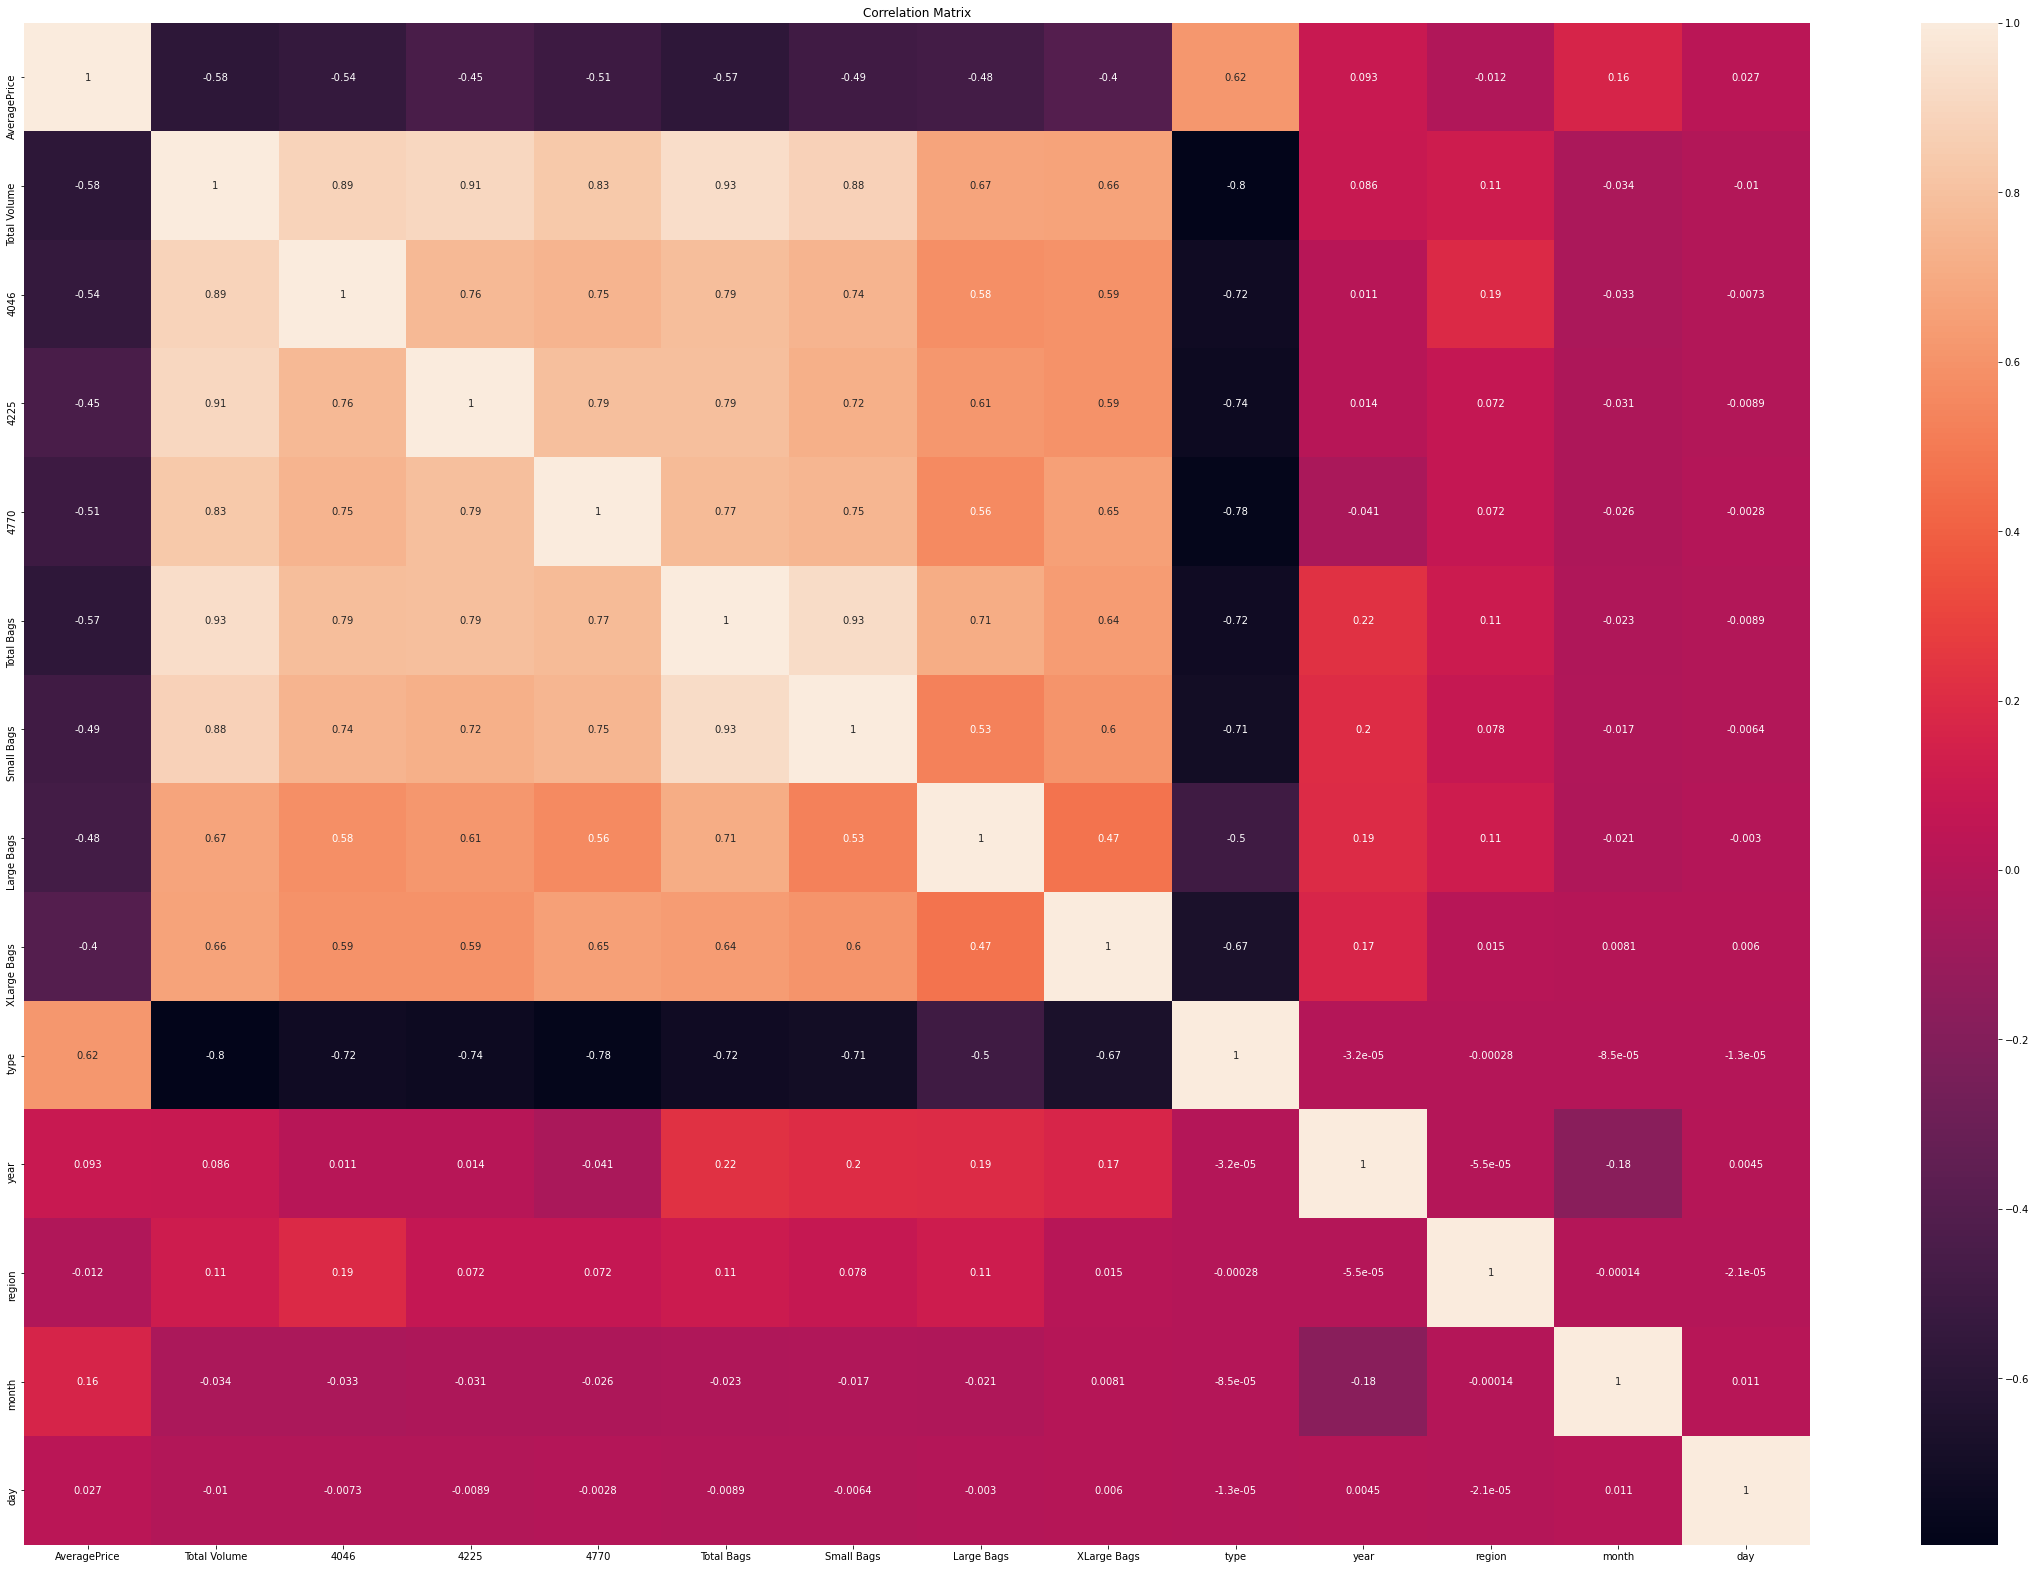

In [23]:
plt.figure(figsize=[40,28])
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [112]:
corr_target = train.corrwith(train['AveragePrice'], axis=0)
corr_target

AveragePrice    1.000000
Total Volume   -0.583411
4046           -0.543861
4225           -0.446584
4770           -0.507234
Total Bags     -0.574931
Small Bags     -0.493520
Large Bags     -0.478741
XLarge Bags    -0.379680
type            0.615845
year            0.093197
region         -0.011716
month           0.162409
day             0.027386
dtype: float64

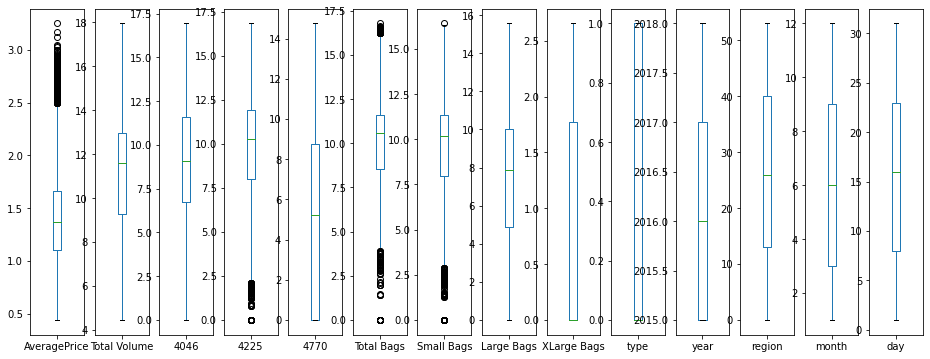

In [27]:
train.plot(kind='box',subplots=True,figsize=[16,6])
plt.show()

We can see that there are some outliers in few columns, so we can zscore to remove those outliers
We can give 3 as threshold value and remove all outliers and then we can build our model.

In [29]:
from scipy import stats
from scipy.stats import zscore
z=np.abs(stats.zscore(train))
z

array([[0.18868864, 0.10728205, 0.60975177, ..., 1.7002522 , 1.64763162,
        1.29185687],
       [0.13901962, 0.1759487 , 0.73770703, ..., 1.7002522 , 1.64763162,
        0.49423066],
       [1.18206895, 0.15869039, 0.68884013, ..., 1.7002522 , 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.77890112, 0.56825116, ..., 1.70081131, 1.46495942,
        0.60817726],
       [1.30138182, 0.70779758, 0.49440715, ..., 1.70081131, 1.46495942,
        0.18944895],
       [0.53151208, 0.67454176, 0.30415101, ..., 1.70081131, 1.46495942,
        0.98707516]])

In [30]:
threshold = 3
print(np.where(z>3))

(array([ 9189,  9190,  9191,  9192,  9192,  9203,  9204,  9205,  9206,
        9211,  9212,  9212,  9213,  9218,  9219,  9220,  9221,  9293,
        9294,  9298,  9668,  9894,  9894, 10154, 10232, 10234, 10324,
       10325, 10326, 10327, 10331, 10332, 10333, 10334, 10334, 10375,
       10377, 10380, 10382, 10388, 10392, 10397, 10398, 10417, 10419,
       10420, 10531, 10532, 10533, 10534, 10535, 10536, 10562, 10563,
       10566, 11011, 11012, 11014, 11015, 11016, 11017, 11018, 11019,
       11020, 11021, 11022, 11023, 11024, 11024, 11025, 11026, 11027,
       11028, 11029, 11030, 11031, 11032, 11033, 11034, 11035, 11036,
       11037, 11039, 11040, 11041, 11042, 11314, 11316, 11318, 11319,
       11320, 11320, 11320, 11321, 11321, 11321, 11322, 11323, 11324,
       11324, 11325, 11325, 11325, 11326, 11326, 11327, 11327, 11328,
       11329, 11329, 11330, 11330, 11331, 11331, 11332, 11332, 11333,
       11333, 11334, 11335, 11336, 11337, 11338, 11338, 11339, 11340,
       11341, 11342

In [31]:
train_new = train[(z<3).all(axis=1)]

In [33]:
print(train.shape)
print(train_new.shape)
train=train_new

(18249, 14)
(17840, 14)


In [34]:
x = train.drop('AveragePrice', axis=1)
y = train['AveragePrice']

In [36]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.5694304505911018

In [39]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10,random_state = 0 )
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
r2_score(y_test, y_pred)

0.8730012838448102

In [48]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(x_train, y_train)
y_pred=KNR.predict(x_test)
r2_score(y_test, y_pred)

0.6485655153937016

In [40]:
from sklearn.svm import SVR

SVR_Reg = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg.fit(x_train, y_train)
y_pred = SVR_Reg.predict(x_test)
r2_score(y_test, y_pred)

0.42278094949633094

In [41]:
from sklearn.tree import DecisionTreeRegressor
RTD = DecisionTreeRegressor(random_state = 0)
RTD.fit(x_train, y_train)
y_pred = RTD.predict(x_test)
r2_score(y_test, y_pred)

0.7727375660281361

In [42]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(reg, x, y, cv=5)
print('Cross validation score of Linear Regression : ',scr.mean())

Cross validation score of Linear Regression :  0.24714711769368652


In [43]:
scr=cross_val_score(RFR, x, y, cv=5)
print('Cross validation score of RFR : ',scr.mean())

Cross validation score of RFR :  0.168430231267668


In [49]:
scr=cross_val_score(KNR, x, y, cv=5)
print('Cross validation score of KNR : ',scr.mean())

Cross validation score of KNR :  -0.15629283852023773


In [44]:
scr=cross_val_score(SVR_Reg, x, y, cv=5)
print('Cross validation score of SVR : ',scr.mean())

Cross validation score of SVR :  -0.182952215032147


In [126]:
scr=cross_val_score(RTD, x, y, cv=5)
print('Cross validation score of RTD : ',scr.mean())

Cross validation score of RTD :  -0.39325884353611906


From all the above models we can see that Random Forest Regressor is the best model

In [50]:
import joblib
joblib.dump(RFR,'Avocado.pkl')

['Avocado.pkl']